In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import hvplot.pandas
from datetime import datetime
import csv
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [2]:
am_article = pd.read_csv('data/am_article_emotions.csv')
fb_article = pd.read_csv('data/fb_article_emotions.csv')
gg_article = pd.read_csv('data/gg_article_emotions.csv')
nf_article = pd.read_csv('data/nf_article_emotions.csv')

In [3]:
am_reddit = pd.read_csv('data/am_reddit_emotions.csv')
fb_reddit = pd.read_csv('data/fb_reddit_emotions.csv')
gg_reddit = pd.read_csv('data/gg_reddit_emotions.csv')
nf_reddit = pd.read_csv('data/nf_reddit_emotions.csv')

In [4]:
am_stock = pd.read_csv('data/AMZN.csv')
fb_stock = pd.read_csv('data/FB.csv')
gg_stock = pd.read_csv('data/GOOG.csv')
nf_stock = pd.read_csv('data/NFLX.csv')

In [5]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
         horizontalalignment='center',
         transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.6),
         fontsize=12.5)
    return ax

In [6]:
def summaryplot(df,company):
    df['modified_positive'] = df['positive'] + df['joy'] + df['trust'] + df['anticipation']
    df['modified_negative'] =  df['negative'] + df['disgust'] + df['anger'] + df['fear']
    df['max'] = df[['anticipation','sadness','joy','trust','surprise','disgust','anger','fear']].max(axis = 1)
    df = df[(df[['max']] != 0).all(axis=1)]
    gridsize = (3, 2)
    fig = plt.figure(figsize=(12, 8))
    ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid(gridsize, (2, 0))
    ax3 = plt.subplot2grid(gridsize, (2, 1))
    ax1.set_title('%s Daily Maximun Emotion Value'%company, fontsize=14)
    sizes = df['max']*3000
    sctr = ax1.scatter(df['date'], df['max'], s = sizes, c = df['max'], cmap='RdYlGn')
    ax2.plot(am_article[['anticipation','sadness','joy','trust','surprise','disgust','anger','fear']].mean())
    ax3.plot(am_article[['modified_negative','modified_positive']].mean())
    add_titlebox(ax2, 'Mean Value for Emotions')
    add_titlebox(ax3, 'Mean Value for Sentiments')

In [7]:
def emotionvsstock(emotion_df, stock_df, company, multiplier = 25000):
    result = pd.merge(emotion_df,
                  stock_df[['Date','Close']],
                 left_on = 'date',
                 right_on = 'Date',
                 how = 'left')
    result['Close'].fillna(method='ffill',inplace = True)
    colormap = {'anticipation': 'red', 'sadness': 'orange', 'joy': 'yellow', 'trust':'green',
            'surprise':'pink','disgust':'blue', 'anger':'purple','fear':'grey'}
    columns = ['anticipation','sadness','joy','trust','surprise','disgust','anger','fear']
    colors = [colormap[x] for x in columns]
    emotion_plot = result.hvplot('date', 
                  columns,
                  cmap= colors,
                  title='%s Daily emotions summary'%company,
                  height=500, width=1000,
                  alpha = 0.6, persist = True, logz = True,
                  kind='scatter')
    result['Close'] = result['Close']/multiplier
    stock = result.hvplot('date', 'Close')
    stock.opts(
    color = 'blue',
    line_width = 2.0)
    return emotion_plot * stock

In [8]:
def emotiondensity(emotion_df, company):
    colormap = {'anticipation': 'red', 'sadness': 'orange', 'joy': 'yellow', 'trust':'green',
            'surprise':'pink','disgust':'blue', 'anger':'purple','fear':'grey'}
    columns = ['anticipation','sadness','joy','trust','surprise','disgust','anger','fear']
    colors = [colormap[x] for x in columns]
    res = emotion_df.hvplot('date', 
                  columns,
                  cmap= colors,
                  title='%s Daily emotions density'%company,
                  height=500, width=1000,
                  alpha = 0.6, persist = True,
                  kind='kde')
    return res

In [25]:
def visual(nytimes):
    text=''
    for i in nytimes['lead_paragraph']:

        text=text+str(i)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=4000,height=3000).generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    return nytimes

# Amazon

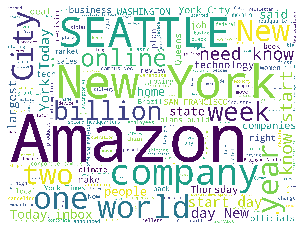

article_id        date     week  \
0   nyt://article/7bdd8874-cc41-504e-9ed7-5a1bfecd...   2018/11/6  2018-45   
1   nyt://article/a44f31db-6946-510c-a93a-0909b63c...   2018/11/6  2018-45   
2   nyt://article/f147e305-8dca-5482-9397-719ddbab...   2018/11/7  2018-45   
3   nyt://article/7d1e968b-e06f-513f-9031-ea0a1d9d...   2018/11/7  2018-45   
4   nyt://article/3e45a203-2a2d-53a9-aa54-4dc5acf1...   2018/11/7  2018-45   
5   nyt://article/8e8732b8-67ab-5889-8e8e-413e9627...   2018/11/9  2018-45   
6   nyt://article/2f231576-1a5a-509b-b604-495113d4...  2018/11/13  2018-46   
7   nyt://article/ec6b2e6e-89b3-5b7a-8ce7-1632feea...  2018/11/13  2018-46   
8   nyt://article/1bad7f97-bb03-5696-af6c-c51ab83a...  2018/11/13  2018-46   
9   nyt://article/85fb4f03-c15b-5c7b-a916-d374a4b6...  2018/11/14  2018-46   
10  nyt://article/c1200a7f-ec30-5f2c-8f75-f76e3d07...  2018/11/14  2018-46   
11  nyt://article/07549d53-1c5e-5649-a752-a49e9eaf...  2018/11/15  2018-46   
12  nyt://article/d56e3ea4-c684-5c24-9661-9cb8bfc3...  2018/11/15  2018-46   
13  nyt://article/03d42fe8-b4e4-5e41-8403-47a8599d...  2018/11/15  2018-46   
14  nyt://article/20c21353-11a1-5ee1-a6b5-bb0d4255...  2018/11/16  2018-46   
15  nyt://article/86695744-26a3-5dab-abe6-caf14b06...  2018/11/16  2018-46   
16  nyt://article/e9314714-4bb3-5518-8b87-da3b8dc6...  2018/11/19  2018-47   
17  nyt://interactive/bdfc940c-974f-5eaa-a080-898a...  2018/11/19  2018-47   
18  nyt://article/65c9605f-02c2-57c2-842c-da8977a2...  2018/11/20  2018-47   
19  nyt://article/f5f28efa-7960-5757-9939-15eb7848...  2018/11/21  2018-47   
20  nyt://article/a11f0c2b-3df2-5275-bdb3-d930ee79...  2018/11/22  2018-47   
21  nyt://article/03974179-3503-5aec-80f2-91a6b0ad...  2018/12/10  2018-50   
22  nyt://article/5aaa04c8-3175-519b-a5a3-7863df7d...  2018/12/12  2018-50   
23  nyt://article/8e264090-40dc-5e7f-b87b-76ba9cba...  2018/12/12  2018-50   
24  nyt://article/9bbe8e20-6339-55b2-9cca-a97a986b...  2018/12/27  2018-52   
25  nyt://article/1faaabeb-51fe-5f7b-9e5d-84e3a06c...  2018/12/27  2018-52   
26  nyt://article/867e6b3d-9462-5c0d-a7fe-db7e2c26...    2019/1/4  2019-01   
27  nyt://article/cf84ee18-6dd6-50f8-8a03-ec1b82b7...   2019/1/20  2019-03   
28  nyt://article/aea0a16b-a3f8-58bb-85d5-7ac58848...   2019/1/29  2019-05   
29  nyt://article/b74a6e14-5db0-5bba-bb27-a700145b...   2019/1/30  2019-05   
..                                                ...         ...      ...   
70  nyt://article/5a1d418e-0c82-5bef-8b81-59812f53...   2019/7/10  2019-28   
71  nyt://article/db9fb70d-586e-54f4-939d-22170f9b...   2019/7/11  2019-28   
72  nyt://article/9d27d871-8491-5150-9b07-e3d8a16f...   2019/7/12  2019-28   
73  nyt://article/3a8cd283-de97-51a4-a284-c4db1dff...   2019/7/17  2019-29   
74  nyt://article/03d4b3b1-42d6-55ea-9684-6114a7b5...   2019/7/23  2019-30   
75  nyt://article/68a8c0ed-10be-5106-8893-b2307407...   2019/7/25  2019-30   
76  nyt://article/9234edd7-fdef-5d5d-a2ad-aad861bd...   2019/7/28  2019-30   
77  nyt://article/5056efdf-805d-574a-9c94-8d65848c...    2019/8/1  2019-31   
78  nyt://article/3deaedc5-f112-53c0-b1eb-72aa743e...    2019/8/7  2019-32   
79  nyt://interactive/903e8adb-bc62-57f2-987e-2706...   2019/8/24  2019-34   
80  nyt://article/d9889dc8-559f-5a9c-b2f3-4d9e056b...   2019/8/27  2019-35   
81  nyt://article/90eaf9f2-a340-5cd2-8e1a-428f1429...   2019/8/28  2019-35   
82  nyt://article/2e5ee4bf-5d46-51f9-85a8-4552f2a1...   2019/8/30  2019-35   
83  nyt://article/611636d5-9260-527d-8ad3-768698db...    2019/9/5  2019-36   
84  nyt://article/62bfc443-3665-53bb-b74a-fbe75b8c...    2019/9/6  2019-36   
85  nyt://article/125670c4-3ff3-5c87-a492-5005ae05...    2019/9/9  2019-37   
86  nyt://article/a1a2d57d-5283-596e-b413-de4d5d66...   2019/9/19  2019-38   
87  nyt://article/47657491-b577-574c-91b9-e291d069...   2019/9/25  2019-39   
88  nyt://article/5af0f61f-2589-5f09-8961-fa61bfe9...  2019/10/16  2019-42   
89  nyt://article/ce27a8ad-b8de-5672-9013-60e534a6...  2019/10/18

In [26]:
visual(am_article)

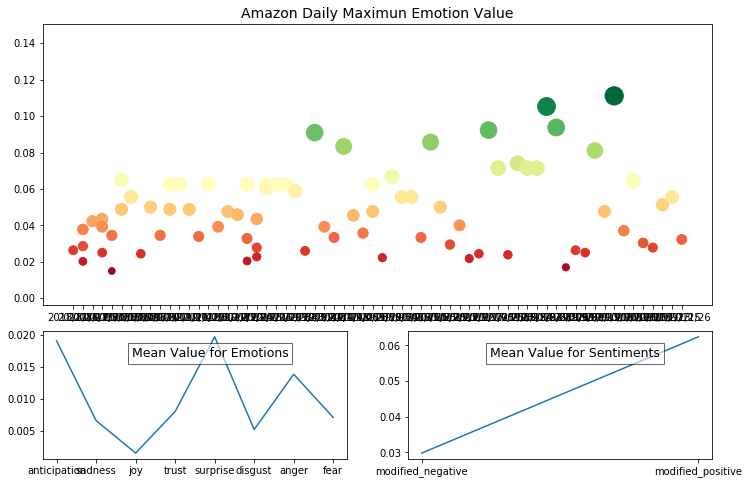

In [9]:
summaryplot(am_article, 'Amazon')

In [10]:
emotionvsstock(am_article, am_stock, 'Amazon', multiplier = 25000)

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Scatter   [date]   (value)
   .Curve.I     :Curve   [date]   (Close)

In [11]:
emotiondensity(am_article, 'Amazon')

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

In [12]:
emotiondensity(am_reddit, 'Amazon')

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

# Facebook

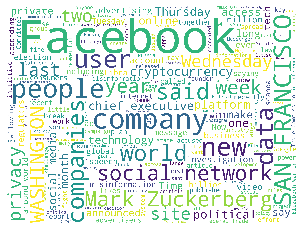

article_id             date  \
0   nyt://article/2b0152cf-932b-5267-8a95-f656cce4...   2018/11/6 0:00   
1   nyt://article/5f8f1936-6980-57dd-8413-83cbf340...  2018/11/16 0:00   
2   nyt://article/71ad4521-ffab-589f-89af-f7434281...  2018/11/17 0:00   
3   nyt://article/940fa4e0-e597-53d9-b3d1-e426d046...  2018/11/16 0:00   
4   nyt://article/41c02d43-addb-589c-a49d-1db30724...  2018/11/16 0:00   
5   nyt://article/5e9c7c53-fa75-59a8-8d44-8e611740...  2018/11/13 0:00   
6   nyt://article/b5c7dd41-56b4-523c-9992-042cbfa9...  2018/11/15 0:00   
7   nyt://article/999713eb-8f39-5e00-84ed-d9ff6a20...  2018/11/17 0:00   
8   nyt://article/0670b72e-8ceb-54b8-8861-bf628ca2...  2018/11/22 0:00   
9   nyt://article/7637b4b5-d619-50f2-ad30-e99bdb2d...  2018/11/30 0:00   
10  nyt://article/1de92f40-1556-5cc9-b0c4-b7cfe576...   2018/12/5 0:00   
11  nyt://article/38756d2f-eadf-50b3-9927-aa4a9b53...  2018/12/13 0:00   
12  nyt://article/d3c15dbc-6c8f-5fac-9a1d-46a4a4cf...  2018/12/19 0:00   
13  nyt://article/2ba7422a-0a54-5d06-964f-49d28750...  2018/12/19 0:00   
14  nyt://article/ba29269b-d65e-563d-b897-ab9746e7...  2018/12/20 0:00   
15  nyt://article/ca197dfd-05de-5456-b374-d2d696c1...  2018/12/20 0:00   
16  nyt://article/0abafe3b-4043-5567-a8b5-6fb6ad72...  2018/12/19 0:00   
17  nyt://article/294c3f52-41c9-52f3-8ef1-ae19f7a1...  2018/12/27 0:00   
18  nyt://article/bfcd8f6e-89f8-585d-8a4e-37d4f7aa...  2018/12/27 0:00   
19  nyt://article/263be430-1dda-5663-8d3e-90287638...  2018/12/31 0:00   
20  nyt://article/794803e4-a978-577f-b2a5-54f8487e...    2019/1/7 0:00   
21  nyt://article/0d86c844-ac5c-5f83-8777-ab4cac31...   2019/1/10 0:00   
22  nyt://article/aa6eb934-540c-5c2f-bdf8-63744948...   2019/1/17 0:00   
23  nyt://article/f899492c-6599-5a84-abde-b143e8e4...   2019/1/16 0:00   
24  nyt://article/a7620ba6-4754-57df-8046-b726c571...   2019/1/19 0:00   
25  nyt://article/2258f720-2a61-5ccb-8272-219c2233...   2019/1/30 0:00   
26  nyt://article/abb26c1a-59bc-5c31-87f4-5d1ea8ef...   2019/1/29 0:00   
27  nyt://article/a09deec9-3460-530f-acf7-aaec6ab7...    2019/2/1 0:00   
28  nyt://article/7249303f-a559-5c57-8ab4-a9457e0b...   2019/1/31 0:00   
29  nyt://article/2d43c3b8-6568-5ce0-88c3-5df8781f...   2019/1/30 0:00   
..                                                ...              ...   
70  nyt://article/4d272d6e-e455-5de9-b0cf-8b1a1e26...   2019/7/25 0:00   
71  nyt://article/d5a684b8-90ac-502b-be5f-32ea40fe...    2019/8/1 0:00   
72  nyt://article/b09a1b20-8f4d-55df-881a-e62247fa...   2019/8/12 0:00   
73  nyt://article/531bf41e-a628-586b-9447-b53d1f54...   2019/8/23 0:00   
74  nyt://article/d203eb16-81db-5c34-8c63-9b3a3aab...   2019/8/22 0:00   
75  nyt://article/fdf01daf-748c-5e9b-8aee-c3dc8b06...   2019/8/28 0:00   
76  nyt://article/ffcfaf72-b94c-57c7-b823-d1a7ec3e...   2019/9/12 0:00   
77  nyt://article/d7946d61-341c-594f-bce6-3703b07a...   2019/9/17 0:00   
78  nyt://article/365c433d-340c-5dd5-8ad6-1c9b066e...   2019/9/26 0:00   
79  nyt://article/d0b6baf2-0b31-543a-9f32-9e168717...   2019/10/4 0:00   
80  nyt://article/f6dbbaf6-a1b3-5fa8-b514-a2c6189a...   2019/10/3 0:00   
81  nyt://article/20eab48f-db6b-5de2-9709-d516a157...  2019/10/12 0:00   
82  nyt://article/cad10f59-42ab-5323-b8eb-95f2170a...  2019/10/10 0:00   
83  nyt://article/6a04050a-18ef-5509-a254-87a13992...  2019/10/11 0:00   
84  nyt://article/650ed249-72ce-5379-aa67-0e428872...   2019/10/8 0:00   
85  nyt://article/a24f64e3-c003-56dd-86d0-dbf50c78...  2019/10/19 0:00   
86  nyt://article/c0e12365-aa44-50f7-97de-24bec21a...  2019/10/17 0:00   
87  nyt://article/48ec4fd4-3c42-58d3-8514-f41d0531...  2019/10/17 0:00   
88  nyt://article/e28494bc-ae9a-549a-bdc8-d27fc39d...  2019/10/25 0:00   
89   nyt://video/451b87ca-17b3-59a6-ae35-89013e976412  2019/10/26 0:00   
90  nyt://article/d3348e1b-9bff-558c-9a41-7b6d3754...  2019/10/22 0:00   
91  nyt://article/9806d44e-608e-5b3b-8ab4-263e5b16...  2019/10/25 0:00   
92  nyt://article/b801be99-1285-5929-8c96-ceaa2

In [27]:
visual(fb_article)

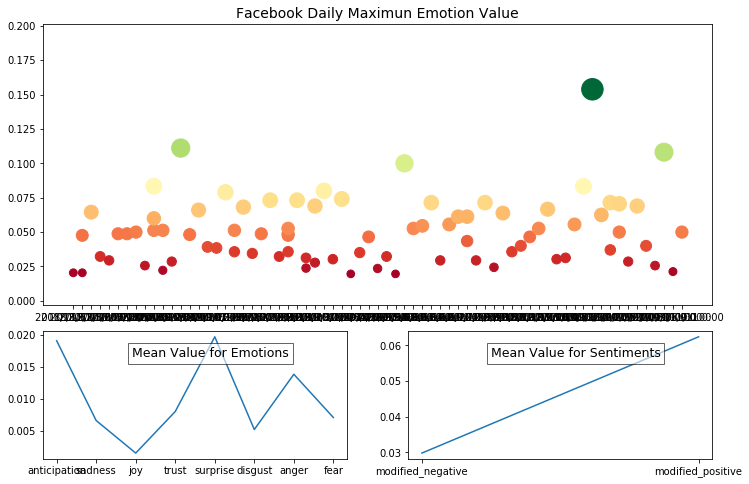

In [13]:
summaryplot(fb_article, 'Facebook')

In [14]:
emotionvsstock(fb_article, fb_stock, 'Facebook', multiplier = 800)

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Scatter   [date]   (value)
   .Curve.I     :Curve   [date]   (Close)

In [15]:
emotiondensity(fb_article, 'Facebook')

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

In [16]:
emotiondensity(fb_reddit, 'Facebook')

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

# Google

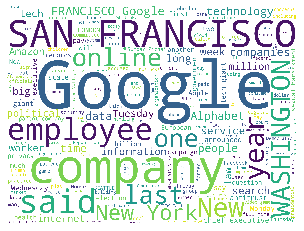

article_id             date  \
0   nyt://article/d3aa8a37-e69f-5c90-bba2-ef0749f7...   2018/11/1 0:00   
1   nyt://article/06f4ba41-7d23-5ea2-8c31-519a9a27...   2018/11/2 0:00   
2    nyt://video/3773e4af-94b1-53bd-9a83-643189f41a2e   2018/11/1 0:00   
3   nyt://article/1b691c0a-86dd-5ab2-b657-a02d7ded...   2018/11/8 0:00   
4   nyt://article/ec568bb7-8807-5951-9795-0bf3b3b7...   2018/11/7 0:00   
5   nyt://article/92c0cad3-0e04-50fc-9ae9-6423f857...   2018/11/8 0:00   
6   nyt://article/7ca224cb-ee03-5478-b351-42793a57...   2018/11/8 0:00   
7   nyt://article/99ac8240-0a1a-5cdc-870c-efcc1cbe...  2018/11/16 0:00   
8   nyt://article/e2dd9967-89ca-52c6-92d1-d74cdef3...  2018/11/14 0:00   
9   nyt://article/cf599403-fa2b-5885-90b0-5d84a8ce...  2018/11/22 0:00   
10  nyt://article/17d6c457-e404-5273-9902-0c681072...   2018/12/7 0:00   
11  nyt://article/ccf70091-5c6c-5266-83cf-5ae3de2a...  2018/12/11 0:00   
12  nyt://article/13bf5bbc-79fd-5b9e-9dc1-1530f03b...  2018/12/14 0:00   
13  nyt://article/b7b3ce40-6cf2-53f4-8ee3-5925ad98...  2018/12/12 0:00   
14  nyt://article/ab7c2a75-05c9-5ff8-8b49-00b42fbe...  2018/12/14 0:00   
15   nyt://video/728e067c-4f87-5ab9-839a-dfc6a21a1132  2018/12/11 0:00   
16  nyt://article/6bba7dc8-9e8c-521f-9d29-35a0fb72...  2018/12/19 0:00   
17  nyt://article/365cf1af-1c4a-5f26-add4-7bfaa6bb...  2018/12/17 0:00   
18  nyt://article/b07c5f4f-9ef4-5227-a196-8b0e3856...    2019/1/4 0:00   
19  nyt://article/6cc2c6e8-f797-5563-9514-e9c0a3fe...   2019/1/21 0:00   
20  nyt://article/614abcc0-088e-5262-a0b3-76976a03...    2019/2/4 0:00   
21  nyt://article/f49f065c-c666-53ec-8dde-704d5d16...   2019/2/21 0:00   
22  nyt://article/adfdd47a-1702-5889-9bd0-50dad91f...    2019/3/4 0:00   
23  nyt://article/2e846053-745e-5b26-87e0-fb91f535...    2019/3/4 0:00   
24  nyt://article/4f7ee76b-e8e4-53e2-af58-07540870...    2019/3/7 0:00   
25  nyt://article/de5ff2ee-7bd7-5438-98a9-8f109364...   2019/3/11 0:00   
26  nyt://article/92737546-da2d-50e8-b2b8-3e8b59e3...   2019/3/20 0:00   
27  nyt://article/8638bf6b-9cb5-5bb4-b0d3-ab513973...   2019/3/19 0:00   
28  nyt://article/288e56a9-dd9b-5ace-9a28-b4da5f65...   2019/3/26 0:00   
29  nyt://article/638861b5-c5a7-524a-8c42-75273e2a...   2019/3/26 0:00   
..                                                ...              ...   
70  nyt://article/d59a35a5-861b-57e8-b95f-36a6367d...   2019/10/2 0:00   
71  nyt://article/bf792289-d234-51c7-842b-cf3bb96a...   2019/10/4 0:00   
72  nyt://article/b6125c95-c322-5ea2-a5c8-52e1ad95...  2019/10/15 0:00   
73  nyt://article/7fc17282-6b9f-5f5e-84bc-7bf49a9d...  2019/10/21 0:00   
74  nyt://article/16a79f69-278a-5b54-b794-7d7722f4...  2019/10/23 0:00   
75  nyt://article/3dda4bfd-3544-5436-9376-03a5b4f6...  2019/10/31 0:00   
76  nyt://article/d9c8af2c-3f04-5de3-a478-3984bcba...   2019/11/1 0:00   
77  nyt://article/c4120319-cc9d-57dc-beb0-124bd608...  2019/10/28 0:00   
78  nyt://article/21f477ff-d453-5fae-ac4b-b92bcd35...  2019/10/29 0:00   
79  nyt://article/70b85b7d-0ce4-5708-815a-6f14f69c...  2019/10/30 0:00   
80  nyt://article/7f5867d8-7e34-5878-899f-0dcf40cc...   2019/11/7 0:00   
81  nyt://article/2e5a5213-d054-57b3-b586-a906cebd...  2019/11/15 0:00   
82  nyt://article/55b3c7ad-9404-5e7d-b281-a80f6b52...  2019/11/12 0:00   
83  nyt://article/fcc124ae-f07a-519d-b46b-6c4acb86...  2019/11/11 0:00   
84  nyt://article/c14b973f-9dc6-58c1-937b-9ca78234...  2019/11/13 0:00   
85  nyt://article/515ec4ac-4d2a-59c7-b98c-f8c179c3...  2019/11/20 0:00   
86  nyt://article/f9b87bb7-5ddb-5dda-99a7-d39b717b...  2019/11/21 0:00   
87  nyt://article/a189873b-e6e0-5d38-ab5d-1a25c288...  2019/11/21 0:00   
88  nyt://article/dac7583b-a0bb-5b3e-acbd-60b71087...  2019/11/21 0:00   
89  nyt://article/a8fb3039-f7d9-553a-864a-f7462c45...  2019/11/18 0:00   
90  nyt://article/7f8830ac-2b2c-5357-9ccd-435f9b56...  2019/11/19 0:00   
91  nyt://article/a8bb8a4b-2eed-57fc-9425-b7f03cc3...  2019/11/22 0:00   
92  nyt://article/965187be-05cf-521d-a682-157e4

In [28]:
visual(gg_article)

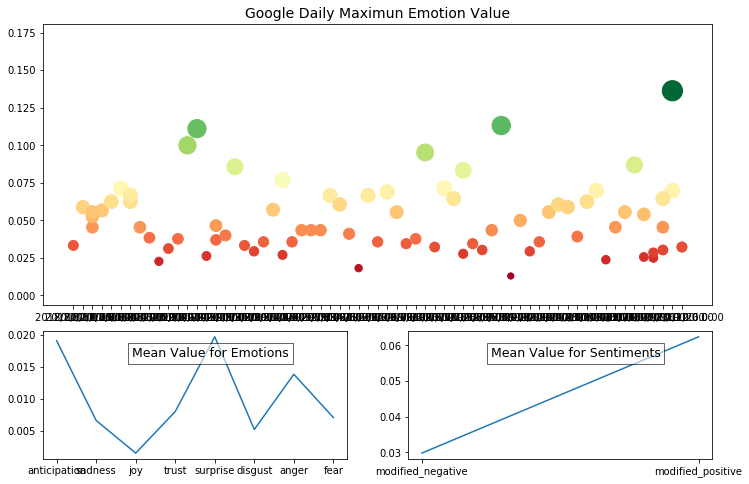

In [17]:
summaryplot(gg_article, 'Google')

In [18]:
emotionvsstock(gg_article, gg_stock, 'Google')

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Scatter   [date]   (value)
   .Curve.I     :Curve   [date]   (Close)

In [19]:
emotiondensity(gg_article, 'Google')

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

In [20]:
emotiondensity(gg_reddit, 'Google')

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

# Netfilx

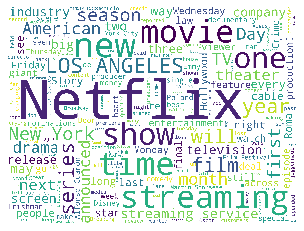

article_id             date  \
0   nyt://article/8a8e3783-7d84-5d0e-8668-7698335f...   2018/11/1 0:00   
1   nyt://article/e2c10a3b-6b36-5830-9c05-ea43c79b...   2018/11/1 0:00   
2   nyt://article/ac41de1c-81e0-58a0-a8fc-c45f7d25...   2018/11/2 0:00   
3   nyt://article/3af9d162-b51e-5389-87b7-ccee7c7b...  2018/11/14 0:00   
4   nyt://article/d0421c6f-5c49-5440-bf5b-5bc6ff41...  2018/11/15 0:00   
5   nyt://article/fd4a885b-40c7-59d2-9607-8f75cb54...  2018/11/27 0:00   
6   nyt://article/208b6b8a-f882-5ca6-a675-b2dfd742...  2018/11/30 0:00   
7   nyt://article/956bb914-52b6-5716-b53e-781c7a64...  2018/11/30 0:00   
8   nyt://article/143b3658-cd4f-5471-af0d-b5577cb1...   2018/12/4 0:00   
9   nyt://article/e84072ff-1ca7-5008-a0df-a1166c95...   2018/12/4 0:00   
10  nyt://article/88e93f45-2d8e-5a90-bc92-d0a42365...   2018/12/5 0:00   
11  nyt://article/eaaf9c78-002c-56da-a56c-ab9e26c4...  2018/12/16 0:00   
12  nyt://article/44aee904-9cea-5bb3-a306-7953f651...  2018/12/14 0:00   
13  nyt://article/bab7f07b-a629-5b19-8a5d-41e46a3e...  2018/12/17 0:00   
14  nyt://article/ca197dfd-05de-5456-b374-d2d696c1...  2018/12/20 0:00   
15  nyt://article/df98a89a-7499-5467-9576-c532e5d5...  2018/12/27 0:00   
16  nyt://article/3cd035f9-173e-5784-973b-9eec44e3...  2018/12/28 0:00   
17  nyt://article/97eef5b0-77a3-5e53-ac5b-750cc3eb...    2019/1/6 0:00   
18  nyt://article/5d95923a-6a7b-56b6-bc69-73925f66...   2019/1/11 0:00   
19  nyt://article/89ab6c8a-f282-5b87-84b6-4683f5a7...   2019/1/11 0:00   
20  nyt://article/207dc44c-2306-573d-a4f8-66b3799c...    2019/1/8 0:00   
21  nyt://article/caafb0d0-5044-5cfc-85fe-307dd010...   2019/1/15 0:00   
22  nyt://article/474952a7-7201-58dd-b5b7-71d78c11...   2019/1/18 0:00   
23  nyt://article/a52f3765-230f-565c-9430-d1fbb68d...   2019/1/17 0:00   
24  nyt://article/ba6b650b-061e-539f-a32f-7830e328...   2019/1/14 0:00   
25  nyt://article/197959cd-9b08-51c8-a70d-97b0080e...   2019/1/21 0:00   
26  nyt://article/197959cd-9b08-51c8-a70d-97b0080e...   2019/1/21 0:00   
27  nyt://article/9aa69f71-e648-540d-b5ae-249b46e2...   2019/1/22 0:00   
28  nyt://article/38fec58a-8493-5a17-8883-5a341830...   2019/1/22 0:00   
29  nyt://article/35e825c2-4a39-537f-9f40-2cedc07f...   2019/1/22 0:00   
..                                                ...              ...   
70  nyt://article/9c78273b-4a9b-5107-a6c7-e1094741...   2019/9/15 0:00   
71  nyt://article/c66187a7-ede2-50d8-8ef5-f0ec8cb8...   2019/9/12 0:00   
72  nyt://article/709d7b88-9e12-586d-bc04-45add22e...   2019/9/16 0:00   
73  nyt://article/5208c4e2-1064-5d13-b90b-eb4fe4a9...   2019/9/16 0:00   
74  nyt://article/6748f3f8-7779-558f-9bda-665ddc39...   2019/9/27 0:00   
75  nyt://article/e7db5117-1bc9-5bdd-b303-664d6ac8...   2019/10/4 0:00   
76  nyt://article/4378c183-2624-568b-b903-d98920cc...   2019/10/3 0:00   
77  nyt://article/a01e75b8-cf28-5eac-baa5-aac3b460...   2019/10/3 0:00   
78  nyt://article/5ce3b050-18a8-541b-9990-8c06be37...   2019/10/2 0:00   
79  nyt://article/e3348a35-0197-5fb1-8ccb-319305dd...  2019/10/11 0:00   
80  nyt://article/1dde4fb0-8e69-5728-8c05-64f8c4f9...  2019/10/17 0:00   
81  nyt://article/09a9b84e-52e3-5c52-a269-5ea4d480...  2019/10/16 0:00   
82  nyt://article/564bcbfe-8ce9-5eed-ab88-5a87b096...  2019/10/16 0:00   
83  nyt://article/d1aa9681-a675-5292-be10-ff764f51...  2019/10/23 0:00   
84  nyt://article/b091c3d4-8cc6-57a0-8705-7c96b6ee...   2019/11/1 0:00   
85  nyt://article/a597460b-2bbe-5985-a148-7c43518d...  2019/10/31 0:00   
86  nyt://article/f03519ef-3a1e-5f59-8d49-182aace5...  2019/10/29 0:00   
87  nyt://article/4f34b249-798b-54ec-816e-ad70ecf0...  2019/10/29 0:00   
88  nyt://article/27b9ce91-da6b-5494-ace7-c2c9d1bd...  2019/10/30 0:00   
89  nyt://article/b4f5d985-1679-5f55-bfbf-e6135ecd...   2019/11/4 0:00   
90  nyt://article/34765999-9b28-5e8b-8edb-ba27182c...   2019/11/5 0:00   
91  nyt://article/03587a05-7b68-50ed-bd9d-dfff8a96...  2019/11/13 0:00   
92  nyt://article/b9b34cee-f97f-5054-adec-9badc

In [29]:
visual(nf_article)

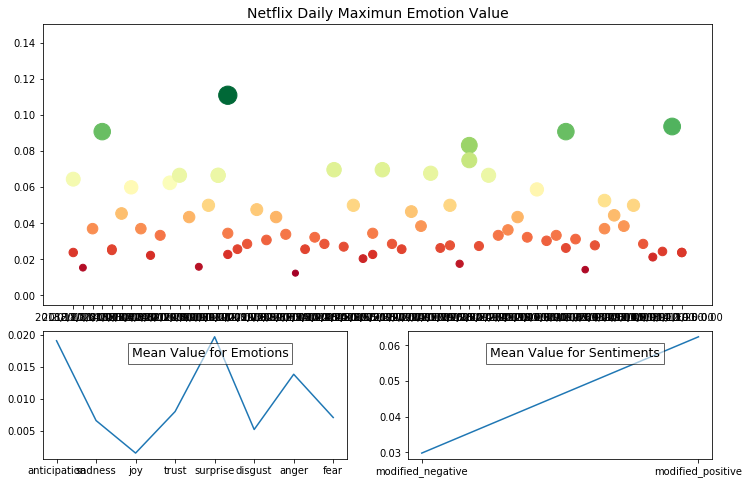

In [21]:
summaryplot(nf_article, 'Netflix')

In [22]:
emotionvsstock(nf_article, nf_stock, 'Netflix')

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Scatter   [date]   (value)
   .Curve.I     :Curve   [date]   (Close)

In [23]:
emotiondensity(nf_article, 'Netflix')

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)

In [24]:
emotiondensity(nf_reddit, 'Netflix')

:NdOverlay   [Variable]
   :Distribution   [value]   (Density)